<a href="https://colab.research.google.com/github/SiraHaruethaipree/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titatic Dataset

วันที่ 15 เมษายน 1912 เรือสำราญที่ขนาดใหญ่ที่สุดที่เคยถูกสร้างมาชนภูเขาน้ำแข็ง ผลจ่ากการจมของเรือ Titanic มีผู้เสียชีวิต 1,502 คน จากผู้โดยสารและลูกเรือทั้งหมด 2,224 คน

หนึ่งในเหตุผลหลักที่มีผู้เสียชีวิตจำนวนมากขนาดนี้ก็คือการที่เรือ Titanic มีจำนวนเรือกู้ชีพ (lifeboat) ไม่เพียงพอต่อจำนวนลูกเรือและผู้โดยสาร ดังนั้นโอกาสรอดชีวิตของลูกเรือโดยสารจึงไม่ได้ขึ้นกับโชคแต่เพียงอย่างเดียว ผู้โดยสารบางกลุ่มมีโอกาสรอดชีวิตมากกว่ากลุ่มอื่นๆ

### Data Description

| Variable | Definition |	Key |
| ------- | ------- |	------- |
| survival |	Survival |	0 = No, 1 = Yes |
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex	| |
| Age	| Age in years |	|
| sibsp |	# of siblings / spouses aboard the Titanic	|  |
| parch |	# of parents / children aboard the Titanic	|  |
| ticket	| Ticket number	|  |
| fare |	Passenger fare	|  |
| cabin |	Cabin number	|  |
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**

pclass: เป็นตัวแปรสำหรับวัดสถานะทางสังคม
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: ถ้าอายุเป็นทศนิยม จะเป็นการประมาณอายุ โดยจะเป็นในรูปแบบ xx.5

sibsp: ชุดข้อมูลนี้นิยามความสัมพันธ์ ญาติ ดังนี้
- Sibling = พี่ชาย/น้องชาย, พี่สาว/น้องสาว, ลูกพี่ลูกน้อง
- Spouse = สามี, ภรรยา

parch: ชุดข้อมูลนี้นิยามความสัมพันธ์ ครอบครัว ดังนี้
- Parent = บิดา, มารดา
- Child = ลูกสาว, ลูกชาย
- เด็กบางคนที่เดินทางกับพี่เลี้ยงจะมี parch=0

### Objective:
**ให้ทำการสร้าง classification model สำหรับทำนายว่าผู้โดยสารจะรอดชีวิตหรือเสียชีวิต**

*คุณควรจะต้องมีการทำ [Feature Engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) เพื่อสร้าง feature ใหม่*

# Import library

ทำการ import ไลบรารี่ที่ใช้ในการทำ machine learning ของโปรเจคนี้

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, classification_report, f1_score, plot_roc_curve, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Import Data

ขั้นตอนการนำเข้าข้อมูล Titanic dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #เชื่อมต่อเข้ากับ google drive

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/machine learning Kmitl/Copy of Copy of titanic_data.xlsx")

หลังจากที่นำเข้าข้อมูลแล้ว ทำการเช็ครายละเอียดคร่าวๆของข้อมูล

In [ ]:
data.head(20) #แสดง 20 บรรทัดแรกของข้อมูล

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.shape # แสดง shape ของข้อมูลมีทั้งหมด 891 แถว 12 คอลัมน์

(891, 12)

In [ ]:
data.info() #แสดง information ของข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


จาก .info() ด้านบนจะเห็นว่ามีบางคอลัมน์ที่มีข้อมูลไม่ครบ 891 แถว เช่น Age, Cabin และยังแสดงให้เห็น type ของแต่ละคอลัมน์

In [ ]:
data.describe() #เช็คค่าทางสถิติต่างๆของ dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isna().sum() #ตรวจสอบ missing value ใน dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

จากผลลัพธ์ด้านบนแสดงให้เห็นว่าคอลัมน์ cabin มี misiing value ถึง 687 และ Age มี 177 และ Embarked มี 2 ตัวที่เป็น missing value 

# Feature Engineering



Round the values at age column

จากข้อมูลทางสถิติจะเห็นว่าอายุที่น้อยที่สุดของชุดข้อมูลนี้อยู่ที่ 0.42 จึงลองเช็คค่าดูว่าผลลัพธ์ของคอลัมน์อายุนั้นเป็นแบบไหน

In [ ]:
data["Age"].value_counts().sort_index()[:20]

0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
Name: Age, dtype: int64

จะเห็นได้ว่าเมื่อข้อมูลมีอายุมากกว่า 1 จะเป็นลักษณะเลขจำนวนเต็ม กับ .5 จึงทำการปัดเศษให้เป็นเลขจำนวนเต็มทั้งหมด

In [ ]:
data["Age"] = data["Age"].apply(np.ceil) #np.ceil จะปัดเศษขึ้นตลอด 

In [ ]:
data["Age"].value_counts().sort_index()[:20] # ผลลัพธ์หลังจากใช้ np.ceil จะเห็นเป็นเลขจำนวนเต็มทั้งหมด

1.0     14
2.0     10
3.0      6
4.0     10
5.0      4
6.0      3
7.0      3
8.0      4
9.0      8
10.0     2
11.0     4
12.0     1
13.0     2
14.0     6
15.0     6
16.0    17
17.0    13
18.0    26
19.0    25
20.0    15
Name: Age, dtype: int64

ขั้นตอน feature engineer ต่อจากนี้จะถูกอ้างอิงมาจากลิ้งที่ได้แนบมา

## Titles



ในคอลัมน์ name จะสกัดเอาคำนำหน้าชื่อมาใช้ในการทำโมเดล โดยจะมีทั้ง Mrs., Miss, Mrและ Master มาไว้คอลัมน์ใหม่

In [ ]:
def substrings_in_string(big_string, substrings): #สร้างฟังก์ชั่นเพื่อตรวจเช็ค string ในคอลัมน์ name
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    return np.nan

In [ ]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer'] # list คำนำหน้าชื่อ

In [ ]:
data['Title']=data['Name'].map(lambda x: substrings_in_string(x, title_list)) 

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
data["Title"].value_counts() #แสดงจำนวนผลลัพธ์ของคำนำหน้าชื่อ ที่ได้ทำการ filter 

Mr          518
Miss        180
Mrs         129
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Mme           1
Ms            1
Mlle          1
Capt          1
Countess      1
Jonkheer      1
Name: Title, dtype: int64

จะเห็นได้ว่าคำนำหน้าชื่อมีค่อนข้างที่จะหลากหลาย จึงทำการลดให้เหลือแค่ Mr, Mrs, Miss, Master ตามเงื่อนไขด้านล่าง

In [ ]:
def replace_titles(x): #ฟังก์ชั่น replace ลกรูปคำนำหน้าชื่อ
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [ ]:
data['Title']=data.apply(replace_titles, axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
data["Title"].value_counts() #ผลลัพธ์สุดท้ายที่ได้ของคอลัมน์ title จะมีจำนวนดังนี้

Mr        531
Miss      182
Mrs       138
Master     40
Name: Title, dtype: int64

## Deck

ในคอลัมน์ Cabin อาจจะไม่ได้นำไปใช้เนื่องจากมี missing data มาก แต่เพื่อการ visualize ออกมาดู ซึ่งจะทำการแทน nan เป็น Unknown และนำไปไว้ในคอลัมน์ Deck ที่ถูกสร้างขึ้นมาใหม่ และทำการแบ่งคลาสตามคำนำหน้าของ cabin เช่น C22, C26  จะถูกตัดให้เหลือแค่ C 

In [ ]:
data["Deck"] = data["Cabin"].fillna("Unknown") # แทนที่ nan ด้วย Unknown

In [ ]:
data["Deck"].value_counts() #ผลลัพธ์จำนวนหลังจากทำการแทน Unknown

Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Deck, Length: 148, dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown


In [ ]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown'] #สกัดเอาเฉพาะตัวอักษรภาษาอังกฤษตัวแรกในคอลัมน์ cabin
data['Deck']=data['Deck'].map(lambda x: substrings_in_string(x, cabin_list))

In [ ]:
data["Deck"].value_counts()

Unknown    687
C           59
B           47
E           33
D           33
A           15
F           12
G            4
T            1
Name: Deck, dtype: int64

## Family Size

Family size จะทำการรวม features SibSp และ Parch เพื่ออาจจะช่วยตอบคำถามว่าการไปเที่ยวคนเดียวนั้นจะทำรอดได้ดีกว่าไหม หรือบางทีการที่ไปทั้งครอบครัวจะทำให้มีอัตรารอดชีวิตมากกว่า 

In [ ]:
data['Family_Size']=data['SibSp']+data['Parch'] #ทำการรวมกันของคอลัมน์ SibSp และ Parch 

In [ ]:
data["Family_Size"].value_counts() #เช็คจำนวนที่ได้หัลงจากรวม Family_size

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown,0


## Age*Class

Age*Class คอลัมน์จะเป็นการรวมของคอลัมน์ Age และ PClass ซึ่งทั้งสองส่วนนี้เป็น interaction เทอม ซึ่งสามารถคูณกันได้

In [ ]:
data['Age*Class']=data['Age']*data['Pclass'] #ทำการคูณกันระหว่างคอลัมน์ Age และ Pclass

In [ ]:
data["Age*Class"].value_counts() #แสดงจำนวนของ Age*Class

48.0     27
54.0     26
60.0     26
66.0     25
72.0     21
         ..
183.0     1
86.0      1
118.0     1
1.0       1
222.0     1
Name: Age*Class, Length: 114, dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown,1,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown,0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown,0,105.0


##Fare_Per_Person

คอลัมน์ Fare_Per_Person จะเป็นการนำคอลัมน์ Fare หารด้วยจำนวน Family_size  เพื่อหาราคาตั๋วต่อหนึ่งคน

In [ ]:
data['Fare_Per_Person']=data['Fare']/(data['Family_Size']+1) #สร้างคอลัมน์ Fare_Per_Person โดยที่ Family_Size จะบวก 1 เพื่อที่จะสามารถนำไปหารได้

In [ ]:
data["Fare_Per_Person"].value_counts() #แสดงจำนวน Fare_Per_Person

13.00000    59
8.05000     50
7.75000     39
7.89580     38
10.50000    28
            ..
35.00000     1
13.86040     1
37.62500     1
27.72085     1
10.51670     1
Name: Fare_Per_Person, Length: 289, dtype: int64

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown,1,66.0,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown,0,78.0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown,0,105.0,8.05000


#EDA

ในส่วนของ EDA หริอ exploratory data analysis จะแสดงกราฟจำนวนของผู้รอดชีวิตเมื่อเทียบกับ Features ในแต่ละ Feature

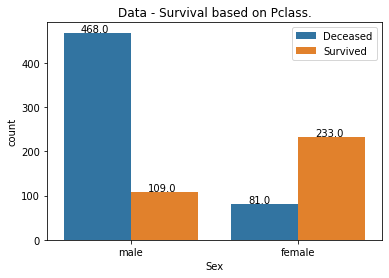

In [ ]:
ax = sns.countplot(x = "Sex" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Pclass.")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

กราฟ Sex จะเห็นได้ว่าเพศหญิงมีอัตราการรอดชีวิตมากกว่าเพศชาย

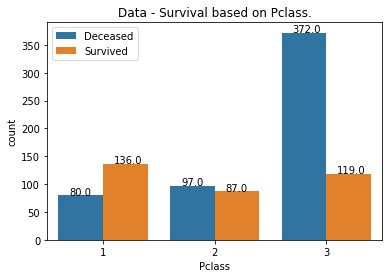

In [ ]:
ax = sns.countplot(x = "Pclass" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Pclass.")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

กราฟจาก feature Pclass จะเห็นได้ว่าคลาสที่ 1 จะมีสัดส่วนของผู้รอดชีวิตมากกว่าผู้เสียชีวิต ส่วนในคลาสที่ 3 จะเป็นคลาสที่มีคนเสียชีวิตมากสุด

Text(0.5, 1.0, 'Data - Survival based on SibSp.')

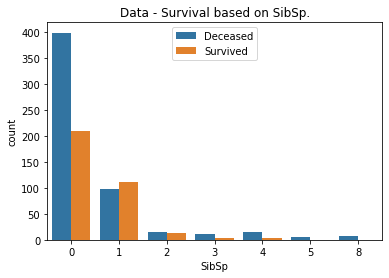

In [ ]:
ax = sns.countplot(x = "SibSp" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on SibSp.")

กราฟจาก SibSp ซึ่งแสดงให้เห็นจำนวนของญาติเมื่อเทียบกับอัตราการรอดชีวิตและเสียชีวิต จะพบว่าผู้ที่โดยสารบนเรือส่วนใหญ่จะมีจำนวนเครือญาติเป็น 0 สิ่งที่น่าสนใจคือในส่วนที่มีเครือญาติเท่ากับ 1 จะมีอัตราส่วนการรอดชีวิตมากกว่าการเสียชีวิต

Text(0.5, 1.0, 'Data - Survival based on Age_Range.')

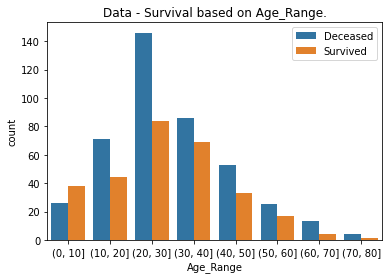

In [ ]:
data['Age_Range'] = pd.cut(data.Age, [0, 10, 20, 30, 40, 50, 60,70,80]) #แบ่งทำช่วงอายุเพื่อใช้ในการพลอตกราฟ
ax = sns.countplot(x = "Age_Range", hue = "Survived", data = data)
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Age_Range.")

กราฟช่วงอายุ Age เมื่อเทียบกับจำนวนผู้รอดชีวิตและผู้เสียชีวิต จะเห็นได้ว่าผู้ที่มีช่วงอายุน้อยกว่า 10 ปีจะมีอัตราการรอดชีวิตที่มากกว่าการเสียชีวิต และช่วงอายุที่มีการโดยสารเรือไททานิคมากสุดอยู่ที่ช่วงอายุ 20-30 ปี

Text(0.5, 1.0, 'Data - Survival based on Parch.')

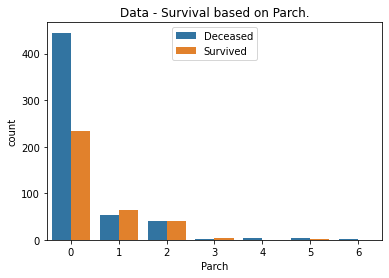

In [ ]:
ax = sns.countplot(x = "Parch" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Parch.")

กราฟแสดงจำนวนครอบครัวที่ไปด้วยเช่น พ่อ แม่ ลูก หลาน ที่เรียกว่า Parch จะเห็นได้ว่า ผู้โดยสารสวนใหญ่เลือกเดินทางคนเดียว และที่ Parch เท่ากับ 1 มีอัตราการรอดชีวิตมากกว่าการเสียชีวิต

In [ ]:
data.Fare.describe() #เช็คค่าทางสถิติของคอลัมน์ราคาตั๋วมีค่าเฉลี่ยของราคาอยู่ที่ 32.2

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Data - Survival based on Fare.')

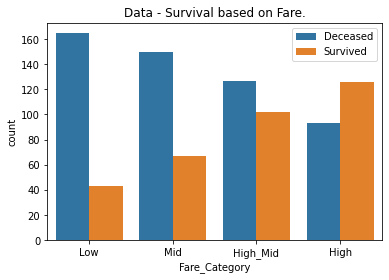

In [ ]:
data['Fare_Category'] = pd.cut(data['Fare'], bins=[0,7.91,14.45,31.00,512], labels=['Low','Mid','High_Mid','High']) #แบ่งประเภทของค่าตั๊วตาม quartile range
ax = sns.countplot(x = "Fare_Category" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Fare.")

จากกราฟ จะเห็นได้ว่าผู้ที่อัตราการรอดชีวิตส่วนใหญ่จะเป็นผู้ที่จ่ายราคาตั๋วในช่วงราคาที่สูงแต่กลับกันคนที่จ่ายค่าโดยสารราถูกกลับมีอัตราผู้เสียชีวิตมากกว่าผู้รอดชีวิต

Text(0.5, 1.0, 'Data - Survival based on embarking point.')

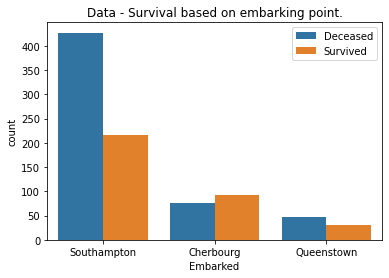

In [ ]:
ax = sns.countplot(x = "Embarked" ,data =data, hue = "Survived")
ax.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on embarking point.")

กราฟเทียบ Embarking กับจำนวนผู้รอดชีวิตและจำนวนผู้เสียชีวิต ซึงจะเห็นได้ว่าผู้โดยสารส่วนใหญ่ขึ้นมาจากท่า Southampton และในส่วนที่น่าสนใจคือ จะเห็นได้ว่าอัตราการรอดชีวิตมากกว่าเสียชีวิตเมื่อมีคนขึ้นที่ท่า Cherbourg

Text(0.5, 1.0, 'Data - Survival based on Title.')

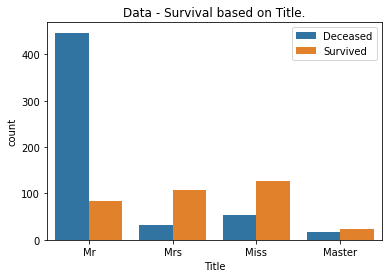

In [ ]:
ax = sns.countplot(x = "Title" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Title.")

กราฟเทียบระหว่างสรรพนามของบุคคลกับอัตราการเสียชีวิตและรอดชีวิต ซึ่งเป็นข้อมูลที่ได้ทำการ feature engineer ก่อนหน้านั้น จะเห็นได้ว่า Mrs Miss และ Master จะมีอัตราการรอดชีวิตมากกว่าเสียชีวิต

Text(0.5, 1.0, 'Data - Survival based on Deck.')

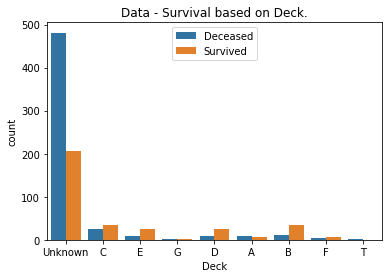

In [ ]:
ax = sns.countplot(x = "Deck" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Deck.")

กราฟ Deck เมื่อเทียบกับจำนวนผู้รอดชีวิตและผู้เสียชีวิต ซึ่งงเป็นกราฟที่ได้จากการ Feature engineer ของคอลัมน์ cabin จะเห็นได้ว่าข้อมูลส่วนใหญ่เป็น Unknown 

Text(0.5, 1.0, 'Data - Survival based on Family_Size.')

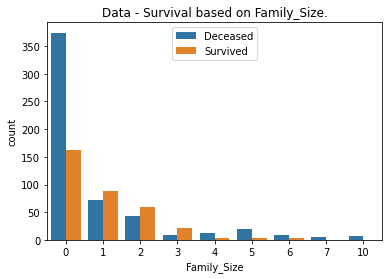

In [ ]:
ax = sns.countplot(x = "Family_Size" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Family_Size.")

กราฟเปรียบเทียบ Family Size กับอัตราการเสียชีวิตและรอดชีวิต จะเห็นได้ว่าคนที่มี Family_size เท่ากับ 1, 2 และ 3 จะมีอัตราการรอดชีวิตมากกว่าเสียชีวิต

In [ ]:
data["Age*Class"].describe()

count    714.000000
mean      61.978992
std       34.405809
min        1.000000
25%       38.000000
50%       58.000000
75%       81.000000
max      222.000000
Name: Age*Class, dtype: float64

Text(0.5, 1.0, 'Data - Survival based on Age*Class.')

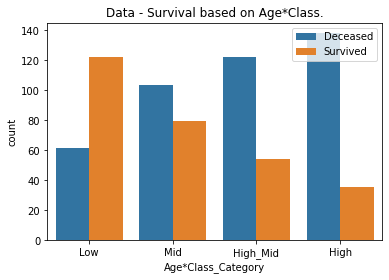

In [ ]:
data['Age*Class_Category'] = pd.cut(data['Age*Class'], bins=[0.92,38,58,81,222], labels=['Low','Mid','High_Mid','High']) #แบ่งประเภทของค่าตั๊วตาม quartile range
ax = sns.countplot(x = "Age*Class_Category" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Age*Class.")

กราฟ "Age*Class" ที่ได้ทำการเทียบจำนวนผู้รอดชีวิตและผู้เสียชีวิต ซึ่งคอลัมน์นี้ถูกสร้างมาจาก Age คูณกับ Class ซึ่งจะเห็นได้ว่า ในส่วนของ Age*class ที่มีค่าน้อยจะมีอัตราการรอดชีวิตมากกว่าเสียชีวิต

In [ ]:
data["Fare_Per_Person"].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: Fare_Per_Person, dtype: float64

Text(0.5, 1.0, 'Data - Survival based on Fare_Per_Person.')

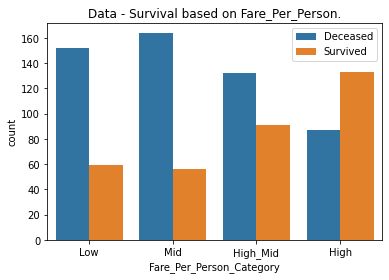

In [ ]:
data['Fare_Per_Person_Category'] = pd.cut(data['Fare_Per_Person'], bins=[0,7.25,8.3,23.67,512.32], labels=['Low','Mid','High_Mid','High']) #แบ่งประเภทของค่าตั๊วตาม quartile range
ax = sns.countplot(x = "Fare_Per_Person_Category" ,data =data, hue = "Survived")
ax.legend(labels = ["Deceased", "Survived"])
ax.set_title("Data - Survival based on Fare_Per_Person.")

กราฟ Fare_Per_Person ที่ได้มาจากการนำ Fare หารด้วย familysize จะเห้นได้ว่าอัตราการรอดชีวิตจะสูงขึ้นเมื่อค่าโดยสารที่จ่ายมีราคาแพง

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person,Age_Range,Fare_Category,Age*Class_Category,Fare_Per_Person_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,Unknown,1,66.0,3.62500,"(20, 30]",Low,High_Mid,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,C,1,38.0,35.64165,"(30, 40]",High,Low,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,Unknown,0,78.0,7.92500,"(20, 30]",Mid,High_Mid,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,C,1,35.0,26.55000,"(30, 40]",High,Low,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,Unknown,0,105.0,8.05000,"(30, 40]",Mid,High,Mid


ทำการเช็คว่าข้อมูลเป็น normal distribution และดูค่าการกระจายของข้อมูล บนคอลัมน์ที่เป็น continous value ที่ประกอบไปด้วยคอลัมน์ Age, Fare, Age*class, Fare_Per_Person

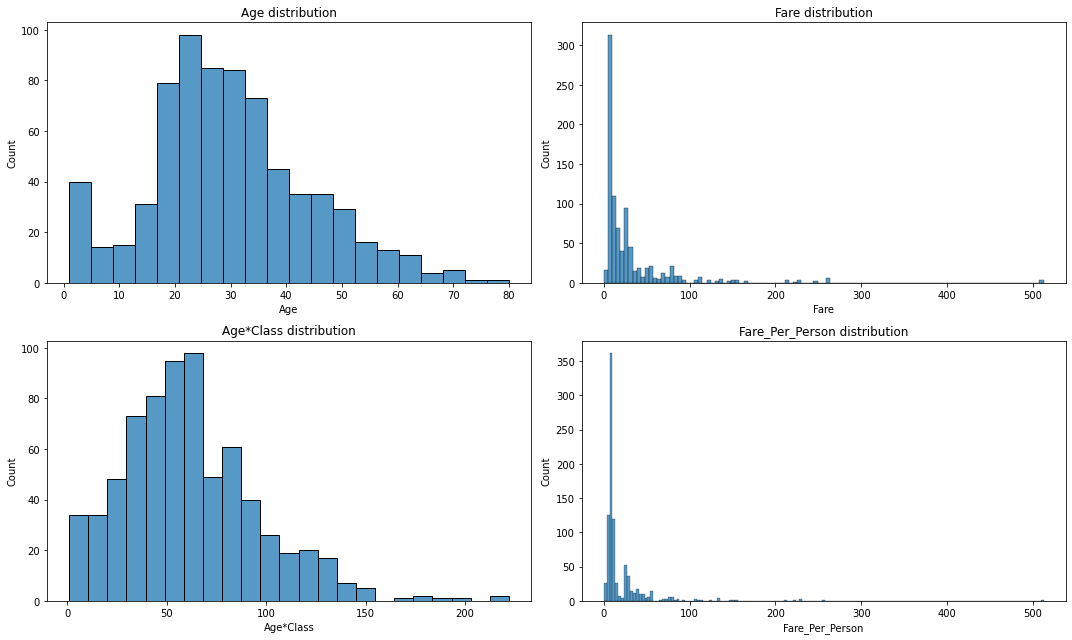

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))
sns.histplot(data = data, x = "Age", ax = axes[0,0])
axes[0,0].set_title("Age distribution")
sns.histplot(data = data, x = "Fare", ax = axes[0,1])
axes[0,1].set_title("Fare distribution")
sns.histplot(data = data, x = "Age*Class", ax = axes[1,0])
axes[1,0].set_title("Age*Class distribution")
sns.histplot(data = data, x = "Fare_Per_Person", ax = axes[1,1])
axes[1,1].set_title("Fare_Per_Person distribution")
plt.tight_layout()

จะเห็นได้ว่าจากกราฟด้านบน Fare distribution กับ Fare_per_person จะเป็นกราฟที่เบ้ขวามาก อาจจะต้องทำการเช็ค outlier และทำการตัดทิ้ง

# Data preparation

ขั้นตอนนี้จะเป็นการเตรียมข้อมูลที่มีเพื่อที่จะนำไปใช้ในการสร้างโมเดล

In [ ]:
data2 = data.drop(columns= ["Age_Range",	"Fare_Category",	"Age*Class_Category",	"Fare_Per_Person_Category"]) #ตัดคอลัมน์ทีได้ทำการสร้างมาแบ่งช่วงเพื่อใช้ในการพลอตกราฟออก
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Unknown,1,66.0,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Unknown,0,78.0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Unknown,0,105.0,8.05000


In [ ]:
data2 = data2.drop(columns= ["PassengerId",	"Name", "Ticket"]) #ตัดคอลัมน์ที่เป้นลักษณะ ID ที่ unique ออก
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,Unknown,1,66.0,3.62500
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,C,1,38.0,35.64165
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,Unknown,0,78.0,7.92500
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,C,1,35.0,26.55000
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,Unknown,0,105.0,8.05000


In [ ]:
data2.describe() #เช็คค่าทางสถิติ

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Age*Class,Fare_Per_Person
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.714286,0.523008,0.381594,32.204208,0.904602,61.978992,19.916375
std,0.486592,0.836071,14.526453,1.102743,0.806057,49.693429,1.613459,34.405809,35.841257
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400,0.000000,38.000000,7.250000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,58.000000,8.300000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,81.000000,23.666667
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,222.000000,512.329200


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              714 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Cabin            204 non-null    object 
 8   Embarked         889 non-null    object 
 9   Title            891 non-null    object 
 10  Deck             891 non-null    object 
 11  Family_Size      891 non-null    int64  
 12  Age*Class        714 non-null    float64
 13  Fare_Per_Person  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


## Check correlation between feature

ทำการพลอตกราฟ heatmap เพื่อดู correlation ระหว่าง feature โดยจะเลือกตัด feature ที่มี correlation ร่วมกันมากกว่า 0.8 ขึ้นไป

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


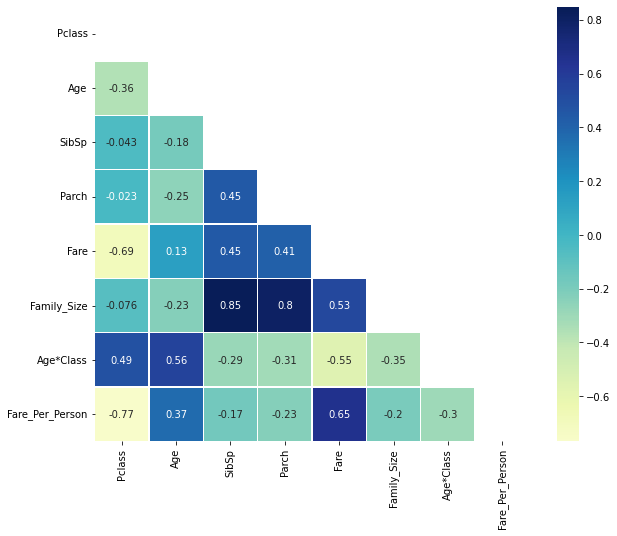

In [ ]:
data_corr = data2.drop(columns = "Survived")
corr = data_corr.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

หลังจากที่ทำการพลอต Heatmap จะเห็นได้ว่าคอลัมน์ Family_size มี correlation เกินกว่า 80 เปอร์เซ็นเมื่อเทียบกับคอลัมน์ SipSp จึงทำการลบคอลัมน์ Family_Size ทิ้งเพื่อไม่ให้เป็นปัญหา bias ในการสร้างโมเดล 

In [ ]:
data2 = data2.drop(columns = "Family_Size") #ลบคอลัมน์ Family_size

## Check unbalance data

ทำการตรวจสอบว่า label ของข้อมูลมีลักษณะเป็น Unbalance data ไหม

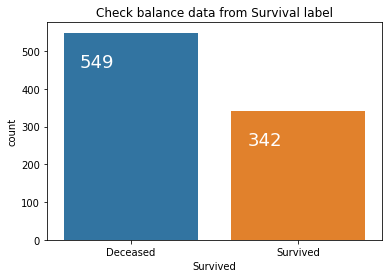

In [ ]:
ax = sns.countplot(x = "Survived" ,data =data)
ax.set_xticklabels(["Deceased", "Survived"])
ax.set_title("Check balance data from Survival label")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

ผลลัพธ์ของข้อมูลนี้จะได้ว่ามีผู้รอดชีวิต 342 คน และเสียชีวิต 342 คน ซึ่งถือว่ายังยอมรับได้อยู่ในเรื่องของความ balance ของข้อมูล 

## Missing data

ก่อนจะทำการหา missing data จะต้องแปลง Unknown ในคอลัม deck ที่สร้างขึ้นมาให้เป็นค่า NaN เหมือนเดิม

In [ ]:
data2["Deck"] = data2["Deck"].replace("Unknown", np.nan, regex = True)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Age*Class,Fare_Per_Person
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr,NaN,66.0,3.62500
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs,C,38.0,35.64165
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss,NaN,78.0,7.92500
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs,C,35.0,26.55000
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr,NaN,105.0,8.05000


หลังจากนั้นทำการเช็ค missing value อีกครั้ง

In [ ]:
missing = data2.isnull().sum()
missing

Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Fare                 0
Cabin              687
Embarked             2
Title                0
Deck               687
Age*Class          177
Fare_Per_Person      0
dtype: int64

ทำการสร้าง dataframe เพื่อแสดงให้เห็นจำนวน missing value และ percent ของ missing value เมื่อเทียบกับจำนวนข้อมูลทั้งหมดมีกี่เปอร์เซ็น 

In [ ]:
total_missing = missing[missing != 0 ]
missing_df = pd.DataFrame(total_missing, columns=["number_of_missing_values"])
missing_df["percent"] = total_missing * 100 / len(data2)
missing_df

,number_of_missing_values,percent
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467
Deck,687,77.104377
Age*Class,177,19.865320


หลังจากทีได้ทำการเช็ตค่า missing value แล้วจะพบว่า 
- คอลัมน์ Cabin และคอลัมน์ deck ที่ถูกสร้างมาจาก cabin มี missing value ค่อนข้างมากถึง 77% จากข้อมูลทั้งหมด เพราะฉะนั้น จะเลือกกำจัดด้วยการลบคอลัมน์นี้ทิ้ง
- คอลัมน์ Age ที่มี missing value เท่ากับ 20% จากข้อมูลทั้งหมด จะแทนด้วยค่า median เนื่องจากกราฟด้านบนที่เคยแสดงเป็น histogram มีพฤติกรรมเบ้ไปด้านใดด้านหนึ่ง
- คอลัมน์ Embarked มี missing value เท่ากับ 0.22% จากข้อมูลทั้งหมดซึ่ง จะทำการแทนด้วยค่า mode
- Age*Class จะทำการสร้างขึ้นมาใหม่เนื่องจาก ได้ทำการแก้ไขคอลัมน์ Age ไป

### Remove Cabin and Deck Column

In [ ]:
data2 = data2.drop(columns = ["Cabin","Deck"]) #ลบคตอลัมน์ Cabin และ Deck

In [ ]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Fare_Per_Person
0,0,3,male,22.0,1,0,7.2500,S,Mr,66.0,3.62500
1,1,1,female,38.0,1,0,71.2833,C,Mrs,38.0,35.64165
2,1,3,female,26.0,0,0,7.9250,S,Miss,78.0,7.92500
3,1,1,female,35.0,1,0,53.1000,S,Mrs,35.0,26.55000
4,0,3,male,35.0,0,0,8.0500,S,Mr,105.0,8.05000


### Replace NaN at Age columns with median value

ในส่วนของคอลัมน์ Age จะถูกแทนที่ด้วยค่า median ในกรณีที่เป็น missing value 

In [ ]:
int(data2["Age"].median())

28

In [ ]:
data2["Age"] = data2["Age"].fillna(int(data2["Age"].median()))
data2.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             2
Title                0
Age*Class          177
Fare_Per_Person      0
dtype: int64

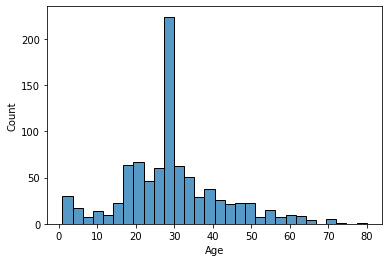

In [ ]:
sns.histplot(x = "Age", data= data2) #พลอตกราฟ histogram แสดงค่าการจายตัวของคอลัมน์ Age

### Replace NaN at Embarked columns with mode value

ทำการแทนที่ missing value ของคอลัมน์ Embarked ด้วยค่า mode

In [ ]:
(data2["Embarked"].mode())[0] #แสดงค่า mode ของ Embarked

'S'

In [ ]:
data2["Embarked"] = data2["Embarked"].fillna(data2["Embarked"].mode()[0])
data2.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
Title                0
Age*Class          177
Fare_Per_Person      0
dtype: int64

### Revise Age*Class columns after replace Age columns

เนื่องจาก ได้ทำการแทนที่ missing value ของ Age ใหม่จึงต้องทำการคำนวณคอลัมน์ Age*Class ใหม่ด้วย

In [ ]:
data2['Age*Class']=data2['Age']*data2['Pclass']

In [ ]:
data2.isna().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
Age*Class          0
Fare_Per_Person    0
dtype: int64

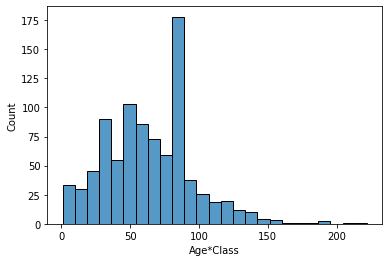

In [ ]:
sns.histplot(x = "Age*Class", data = data2)

## Check Outlier 

ทำการเช็ค Outlier กับคอลัมน์ที่มีตัวแปรเป็น Continuous value ซึ่งจะอยู่ในคอลัมน์ "Age", "Fare", "Age*Class", "Fare_Per_Person"

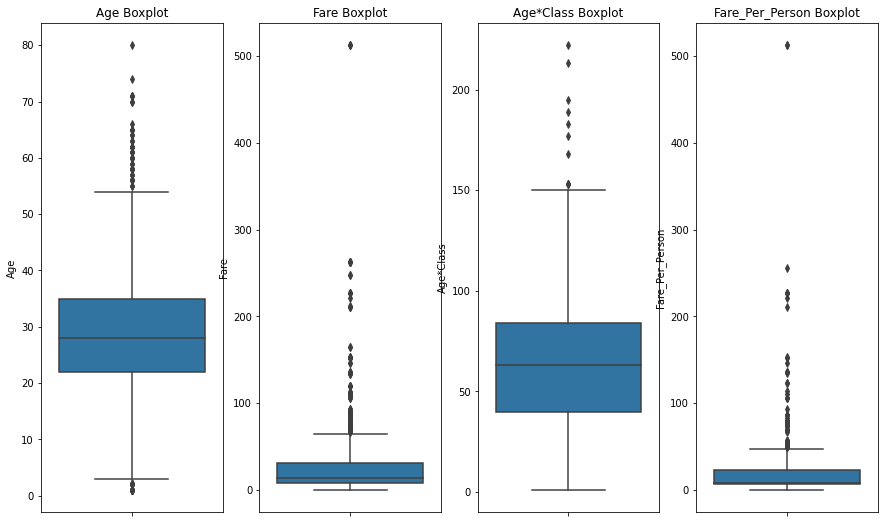

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 9))
index = 0
for i in ["Age", "Fare", "Age*Class", "Fare_Per_Person"] :
  sns.boxplot(y = i, data= data2, ax = axes[index])
  axes[index].set_title( i + " Boxplot")
  index += 1

กราฟ Boxplot ด้านบนจะแสดงถึงช่วงของข้อมูลและแสดงค่า Outlier 

### Outlier Age

หา Outlier ของคอลัมน์ Age โดยจะทำการตัด outlier ที่ upper limit ของ IQR + 1.5 ขึ้นไปและ lower limit ของ IQR - 1.5 ลงมา 

In [ ]:
cal_Q1 = data2["Age"].quantile(0.25)
cal_Q3 = data2["Age"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR

In [ ]:
data2[(data2["Age"] < lower_limit) | (data2["Age"] > upper_limit)] 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Fare_Per_Person
7,0,3,male,2.0,3,1,21.0750,S,Master,6.0,4.215000
11,1,1,female,58.0,0,0,26.5500,S,Miss,58.0,26.550000
15,1,2,female,55.0,0,0,16.0000,S,Mrs,110.0,16.000000
16,0,3,male,2.0,4,1,29.1250,Q,Master,6.0,4.854167
33,0,2,male,66.0,0,0,10.5000,S,Mr,132.0,10.500000
...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.0,0,2,37.0042,C,Master,2.0,12.334733
829,1,1,female,62.0,0,0,80.0000,S,Mrs,62.0,80.000000
831,1,2,male,1.0,1,1,18.7500,S,Master,2.0,6.250000
851,0,3,male,74.0,0,0,7.7750,S,Mr,222.0,7.775000


จากตารางด้านบนแสดงค่า Outlier ที่เกิดขึ้นกับคอลัมน์ Age มีทั้งหมด 66 แถวที่จะตัดออก

In [ ]:
data2 = data2[(data2["Age"] >= lower_limit) & (data2["Age"] <= upper_limit)]
data2.shape

(825, 11)

หลังจากตัด Outlier ไปแล้วจะเหลือแถวทั้งหมด 825 แถว

### Outlier Fare

หา Outlier ของคอลัมน์ Fare โดยจะทำการตัด outlier ที่ upper limit ของ IQR + 1.5 ขึ้นไปและ lower limit ของ IQR - 1.5 ลงมา 

In [ ]:
cal_Q1 = data2["Fare"].quantile(0.25)
cal_Q3 = data2["Fare"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR

In [ ]:
data2[(data2["Fare"] < lower_limit) | (data2["Fare"] > upper_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Fare_Per_Person
1,1,1,female,38.0,1,0,71.2833,C,Mrs,38.0,35.641650
27,0,1,male,19.0,3,2,263.0000,S,Mr,19.0,43.833333
31,1,1,female,28.0,1,0,146.5208,C,Mrs,28.0,73.260400
34,0,1,male,28.0,1,0,82.1708,C,Mr,28.0,41.085400
52,1,1,female,49.0,1,0,76.7292,C,Mrs,49.0,38.364600
...,...,...,...,...,...,...,...,...,...,...,...
835,1,1,female,39.0,1,1,83.1583,C,Miss,39.0,27.719433
846,0,3,male,28.0,8,2,69.5500,S,Mr,84.0,6.322727
849,1,1,female,28.0,1,0,89.1042,C,Mrs,28.0,44.552100
856,1,1,female,45.0,1,1,164.8667,S,Mrs,45.0,54.955567


จากตารางด้านบนแสดงค่า Outlier ที่เกิดขึ้นกับคอลัมน์ Fare มีทั้งหมด 107 แถวที่จะตัดออก

In [ ]:
data2 = data2[(data2["Fare"] >= lower_limit) & (data2["Fare"] <= upper_limit)]
data2.shape

(718, 11)

หลังจากตัด Outlier ไปแล้วจะเหลือแถวทั้งหมด 718 แถว

### Outlier Age*Class

หา Outlier ของคอลัมน์ Age*Class โดยจะทำการตัด outlier ที่ upper limit ของ IQR + 1.5 ขึ้นไปและ lower limit ของ IQR - 1.5 ลงมา 

In [ ]:
cal_Q1 = data2["Age*Class"].quantile(0.25)
cal_Q3 = data2["Age*Class"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR

In [ ]:
data2[(data2["Age*Class"] < lower_limit) | (data2["Age*Class"] > upper_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Fare_Per_Person
132,0,3,female,47.0,1,0,14.5000,S,Mrs,141.0,7.2500
222,0,3,male,51.0,0,0,8.0500,S,Mr,153.0,8.0500
406,0,3,male,51.0,0,0,7.7500,S,Mr,153.0,7.7500
482,0,3,male,50.0,0,0,8.0500,S,Mr,150.0,8.0500
592,0,3,male,47.0,0,0,7.2500,S,Mr,141.0,7.2500
597,0,3,male,49.0,0,0,0.0000,S,Mr,147.0,0.0000
631,0,3,male,51.0,0,0,7.0542,S,Mr,153.0,7.0542
736,0,3,female,48.0,1,3,34.3750,S,Mrs,144.0,6.8750
771,0,3,male,48.0,0,0,7.8542,S,Mr,144.0,7.8542
873,0,3,male,47.0,0,0,9.0000,S,Mr,141.0,9.0000


จากตารางด้านบนแสดงค่า Outlier ที่เกิดขึ้นกับคอลัมน์ Fare มีทั้งหมด 10 แถวที่จะตัดออก

In [ ]:
data2 = data2[(data2["Age*Class"] >= lower_limit) & (data2["Age*Class"] <= upper_limit)]
data2.shape

(708, 11)

หลังจากตัด Outlier ไปแล้วจะเหลือแถวทั้งหมด 708 แถว

### Outlier Fare_Per_Person

หา Outlier ของคอลัมน์ Fare_Per_Person โดยจะทำการตัด outlier ที่ upper limit ของ IQR + 1.5 ขึ้นไปและ lower limit ของ IQR - 1.5 ลงมา 

In [ ]:
cal_Q1 = data2["Fare_Per_Person"].quantile(0.25)
cal_Q3 = data2["Fare_Per_Person"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR

จากตารางด้านบนแสดงค่า Outlier ที่เกิดขึ้นกับคอลัมน์ Fare_Per_Person มีทั้งหมด 98 แถวที่จะตัดออก

In [ ]:
data2[(data2["Fare_Per_Person"] < lower_limit) | (data2["Fare_Per_Person"] > upper_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Fare_Per_Person
3,1,1,female,35.0,1,0,53.1000,S,Mrs,35.0,26.5500
6,0,1,male,54.0,0,0,51.8625,S,Mr,54.0,51.8625
20,0,2,male,35.0,0,0,26.0000,S,Mr,70.0,26.0000
23,1,1,male,28.0,0,0,35.5000,S,Mr,28.0,35.5000
30,0,1,male,40.0,0,0,27.7208,C,Mr,40.0,27.7208
...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,male,51.0,0,0,26.5500,S,Mr,51.0,26.5500
862,1,1,female,48.0,0,0,25.9292,S,Mrs,48.0,25.9292
867,0,1,male,31.0,0,0,50.4958,S,Mr,31.0,50.4958
887,1,1,female,19.0,0,0,30.0000,S,Miss,19.0,30.0000


In [ ]:
data2 = data2[(data2["Fare_Per_Person"] >= lower_limit) & (data2["Fare_Per_Person"] <= upper_limit)]
data2.shape

(610, 11)

หลังจากตัด Outlier ไปแล้วจะเหลือแถวทั้งหมด 610 แถว

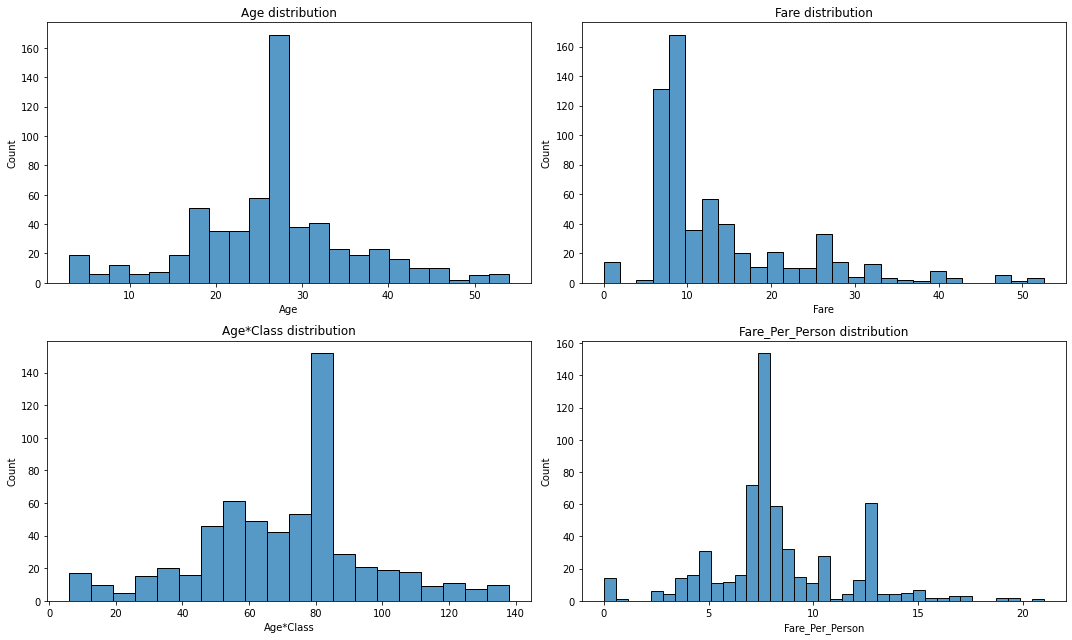

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,9))
sns.histplot(data = data2, x = "Age", ax = axes[0,0])
axes[0,0].set_title("Age distribution")
sns.histplot(data = data2, x = "Fare", ax = axes[0,1])
axes[0,1].set_title("Fare distribution")
sns.histplot(data = data2, x = "Age*Class", ax = axes[1,0])
axes[1,0].set_title("Age*Class distribution")
sns.histplot(data = data2, x = "Fare_Per_Person", ax = axes[1,1])
axes[1,1].set_title("Fare_Per_Person distribution")
plt.tight_layout()

หลังจากที่ลบ Outlier ออกแล้ว พลอตกราฟ histrogram เพื่อดูว่า normal distribution ไหม 

## One-hot Encoding 

ขั้นตอนนี้จะเปลี่ยนตัวแปรที่เป็น Categories ให้อยู่ในรูปแบบของ one-hot encodding เพื่อที่จะนำไปสร้างโมเดลได้

In [ ]:
data2["Sex_num"] = data2["Sex"].apply(lambda x : 1 if  x == "male" else 0) #แปลง male ให้เท่ากับ 1 และ female ให้เท่ากับ 0 ในคอลัมน์ Sex
data2 = data2.drop(columns = "Sex")
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Fare_Per_Person,Sex_num
0,0,3,22.0,1,0,7.2500,S,Mr,66.0,3.6250,1
2,1,3,26.0,0,0,7.9250,S,Miss,78.0,7.9250,0
4,0,3,35.0,0,0,8.0500,S,Mr,105.0,8.0500,1
5,0,3,28.0,0,0,8.4583,Q,Mr,84.0,8.4583,1
8,1,3,27.0,0,2,11.1333,S,Mrs,81.0,3.7111,0


In [ ]:
data2 = pd.get_dummies(data2) #ใช้คำสั่ง get_dummies จะทำการ one-hot อัตโนมัติกับคอลัมน์ที่ยังเป็น category อยู่

In [ ]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age*Class,Fare_Per_Person,Sex_num,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,22.0,1,0,7.2500,66.0,3.6250,1,0,0,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,78.0,7.9250,0,0,0,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,105.0,8.0500,1,0,0,1,0,0,1,0
5,0,3,28.0,0,0,8.4583,84.0,8.4583,1,0,1,0,0,0,1,0
8,1,3,27.0,0,2,11.1333,81.0,3.7111,0,0,0,1,0,0,0,1


## Check data type

ขั้นตอน Check data type จะทำการเช็คประเภทของข้อมูลว่าถูกต้องเหมาะสมหรือไม่

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         610 non-null    int64  
 1   Pclass           610 non-null    int64  
 2   Age              610 non-null    float64
 3   SibSp            610 non-null    int64  
 4   Parch            610 non-null    int64  
 5   Fare             610 non-null    float64
 6   Age*Class        610 non-null    float64
 7   Fare_Per_Person  610 non-null    float64
 8   Sex_num          610 non-null    int64  
 9   Embarked_C       610 non-null    uint8  
 10  Embarked_Q       610 non-null    uint8  
 11  Embarked_S       610 non-null    uint8  
 12  Title_Master     610 non-null    uint8  
 13  Title_Miss       610 non-null    uint8  
 14  Title_Mr         610 non-null    uint8  
 15  Title_Mrs        610 non-null    uint8  
dtypes: float64(4), int64(5), uint8(7)
memory usage: 51.8 KB


หลังจากทำการตรวจสอบแล้วไม่พบความผิดปกติเกี่ยวกับ Data type

## Train-Test Split

ในส่วนจะเป็นการแบ่งข้อมูลสำหรับ train set และ test set

In [ ]:
X = data2.iloc[:, 1:].values #กำหนดให้ Feature ทั้งหมด เป็น X
y = data2.iloc[:, :1].values #กำหนดให้คอลัมน์ survived เป็น y

สร้าง X_train และ y_train ไว้สำหรับการ train ข้อมูลส่วน X_test และ y_test ใช้ในการ test ข้อมูล 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1, shuffle = True, stratify = y) 

โดย train_test_split จะทำการกำหนด 
- shuffle = True เพื่อให้สับเปลี่ยนข้อมูลก่อนแบ่ง train test
- stratify = y เพื่อการกำหนดการกระจายของข้อมูลที่ split ให้มีการกระจายเหมือน original dataset

In [ ]:
X_train.shape

(488, 15)

ขนาดของข้อมูล train มีขนาด 488 แถว

In [ ]:
X_test.shape

(122, 15)

ขนาดของข้อมูล test มีขนาด 122 แถว

In [ ]:
X_train[0] #แสดงข้อมูล X_train ของ index แรก

array([ 3.    , 28.    ,  1.    ,  2.    , 23.45  , 84.    ,  5.8625,
        0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  0.    ,
        0.    ])

In [ ]:
X_test[0] #แสดงข้อมูล X_test ของ index แรก

array([  3.   ,  39.   ,   0.   ,   0.   ,   7.925, 117.   ,   7.925,
         1.   ,   0.   ,   0.   ,   1.   ,   0.   ,   0.   ,   1.   ,
         0.   ])

In [ ]:
y_train[0] #แสดงข้อมูล y_train ของ index แรก

array([0])

In [ ]:
y_test[0] #แสดงข้อมูล y_test ของ index แรก

array([0])

## Feature Scaling

การทำ feature scaling ข้อมูลเพื่อให้ข้อมูลในทุกคอลัมน์อยู่ในสเกลเดียวกัน และเพื่อให้ไม่ส่งผลต่อโมเดล weigth ไปที่คอลัมน์ใดคอลัมน์หนึ่งจึงต้องทำการสเกลก่อน โดยจะใช้ StandardScaler ซึ่งมีค่าช่วงอยู่ระหว่าง -3 ถึง 3

In [ ]:
sc = StandardScaler()
X_train[:, :7] = sc.fit_transform(X_train[:, :7]) # จะ fit_tranform ที่ train set ก่อน
X_test[:, :7] = sc.transform(X_test[:, :7])  # ในส่วนของ test_set จะ transform อย่างเดียว

การสเกลข้อมูลจะสเกลเพียงแค่คอลัม 7 คอลัมน์แรกเนื่องจากคอลัมน์ที่เหลือถูกทำ one_hot เป็น 0 กับ 1 แล้วไม่จำเป็นต้องสเกล

In [ ]:
X_train[0] #แสดงข้อมูล X_train ของ index แรกหลังจากสเกล 

array([ 0.60206566,  0.11027478,  0.67814305,  1.97815056,  1.06187017,
        0.48610694, -0.78002768,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [ ]:
X_test[0] #แสดงข้อมูล X_test ของ index แรกหลังจากสเกล 

array([ 0.60206566,  1.2941848 , -0.50376341, -0.42617689, -0.63481084,
        1.78003524, -0.16437169,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ])

# Create machine learning model

ขั้นตอนต่อไปจะนำข้อมูลที่ได้ทำการเตรียมไปสร้างโมเดล machine learning ซึ่งจะมีโมเดล ดังนี้
- Decision tree
- SVM
- KNN
- Naive Bayes
- Random Forest 
- Logistic Regression 
- XGBoost
- Ensemble

โดยในแต่ละโมเดลจะทำการ Tune hyperparameter ด้วย GridSearchCV และกำหนด Cross-Validation ที่ 5 และ scoring ประสิทธิภาพการประเมินจะกำหนดให้เป็น f1 เนื่องจาก ต้องการสนใจ label ทั้ง 1 และ 0 

## Decision tree 

In [ ]:
param_dist = {"criterion" : ["gini", "entropy"],
              "ccp_alpha" : [0.1, .01, .001, 0.0001],
              "min_samples_split" : range(1, 41, 5),
              "max_depth" : [3,5,7,9,None],
              }

ctree = DecisionTreeClassifier(random_state= 1)
ctree_cv = GridSearchCV(ctree, param_dist, cv = 5, scoring = 'f1')

Parameter ที่จะใช้ในการ tune decision tree มีดังนี้ 
ข้อมูลจาก [link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


- criterion{“gini”, “entropy”, “log_loss”}, default=”gini” The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain

- ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

- min_samples_split int or float, default=2
The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number.

- max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


In [ ]:
ctree_cv.fit(X_train,y_train) # train ข้อมูล

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_split': range(1, 41, 5)},
             scoring='f1')

In [ ]:
ctree_cv.best_params_ #แสดงค่า best parameter ที่ได้จากการ tune 

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 6}

In [ ]:
tree_y_pred = ctree_cv.predict(X_test) #ทำการ predict กับ test set 

In [ ]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        85
           1       0.81      0.81      0.81        37

    accuracy                           0.89       122
   macro avg       0.86      0.86      0.86       122
weighted avg       0.89      0.89      0.89       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.89
- มี F1-score ที่ label 0 เท่ากับ 0.92
- มี F1-score ที่ label 1 เท่ากับ 0.81

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


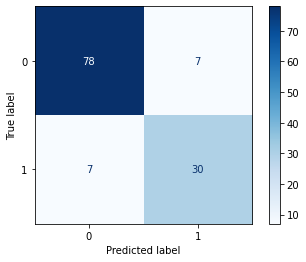

In [ ]:
plot_confusion_matrix(ctree_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 30
- TN = 78
- FP = 7
- FN = 7

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.87

In [ ]:
accuracy_score(y_test, tree_y_pred)

0.8852459016393442

ค่าความแม่นยำ Accuracy ได้ 0.88

In [ ]:
scores_model = [] #สร้าง list ขึ้นมาเก็บค่า score ที่ได้ 
scores_model.append({'Model': 'Decision Tree',
                    'F1_Score': f1_score(y_test, tree_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, tree_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ Decision tree model

## SVM

In [ ]:
param_dist = {"kernel" : ["rbf"],
              'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, "scale", "auto"]
              }
csvm = SVC(random_state= 1)
csvm_cv = GridSearchCV(csvm, param_dist, cv = 5, scoring = 'f1')

Parameter ที่จะใช้ในการ tune SVM (support vector machine) มีดังนี้ 
ข้อมูลจาก [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’ Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

- C float, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

- gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, if ‘auto’, uses 1 / n_features.

In [ ]:
csvm_cv.fit(X_train,y_train) # train ข้อมูล

In [ ]:
csvm_cv.best_params_ #แสดงค่า best parameter ที่ได้จากการ tune 

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
svm_y_pred = csvm_cv.predict(X_test) #ทำการ predict กับ test set 

In [ ]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        85
           1       0.83      0.78      0.81        37

    accuracy                           0.89       122
   macro avg       0.87      0.86      0.86       122
weighted avg       0.88      0.89      0.88       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.89
- มี F1-score ที่ label 0 เท่ากับ 0.92
- มี F1-score ที่ label 1 เท่ากับ 0.81

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


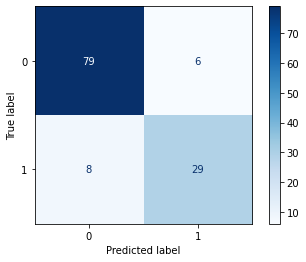

In [ ]:
plot_confusion_matrix(csvm_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 29
- TN = 79
- FP = 6
- FN = 8

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.84

In [ ]:
accuracy_score(y_test, svm_y_pred)

0.8852459016393442

ค่าความแม่นยำ Accuracy ได้ 0.88

In [ ]:
scores_model.append({'Model': 'SVM', #เก็บค่า score ที่ได้ใน scores_model
                    'F1_Score': f1_score(y_test, svm_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, svm_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'SVM',
  'F1_Score': 0.8055555555555555,
  'Accuracy_Score': 0.8852459016393442}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ SVM model

## KNN

In [ ]:
param_dist = {"leaf_size" : list(range(1,50)),
              'n_neighbors': list(range(1,10)),
              'p': [1, 2],
              'weights' : ["uniform", "distance"]
              }
cknn = KNeighborsClassifier()
cknn_cv = GridSearchCV(cknn, param_dist, cv = 5, scoring = 'f1')

Parameter ที่จะใช้ในการ tune KNN มีดังนี้ 
ข้อมูลจาก [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.

- weights{‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction. Possible values:
    - ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

    - ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

- pint, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

- leaf_sizeint, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

In [ ]:
cknn_cv.fit(X_train, y_train) # train ข้อมูล

In [ ]:
cknn_cv.best_params_ #แสดงค่า best parameter ที่ได้จากการ tune 

{'leaf_size': 1, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [ ]:
knn_y_pred = cknn_cv.predict(X_test) #ทำการ predict กับ test set 

In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90        85
           1       0.85      0.59      0.70        37

    accuracy                           0.84       122
   macro avg       0.84      0.77      0.80       122
weighted avg       0.84      0.84      0.84       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.84
- มี F1-score ที่ label 0 เท่ากับ 0.90
- มี F1-score ที่ label 1 เท่ากับ 0.70

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


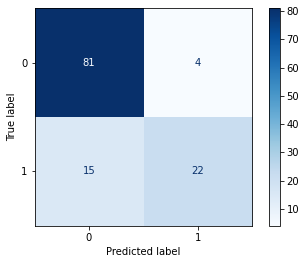

In [ ]:
plot_confusion_matrix(cknn_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 22
- TN = 81
- FP = 4
- FN = 15

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.89

In [ ]:
accuracy_score(y_test, knn_y_pred)

0.8442622950819673

ค่าความแม่นยำ Accuracy ได้ 0.84

In [ ]:
scores_model.append({'Model': 'KNN', #เก็บค่า score ที่ได้ใน scores_model
                    'F1_Score': f1_score(y_test, knn_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, knn_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'SVM',
  'F1_Score': 0.8055555555555555,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'KNN',
  'F1_Score': 0.6984126984126985,
  'Accuracy_Score': 0.8442622950819673}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ KNN model

## Naive Bayes

In [ ]:
param_dist = {"var_smoothing" : np.logspace(0,-9, num=100)
              }
cnb = GaussianNB()
cnb_cv = GridSearchCV(cnb, param_dist, cv = 5,  scoring = 'f1')

Parameter ที่จะใช้ในการ tune Naive Bayes มีดังนี้ 
ข้อมูลจาก [link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

- var_smoothingfloat, default=1e-9
Portion of the largest variance of all features that is added to variances for calculation stability.

In [ ]:
cnb_cv.fit(X_train, y_train) #train ข้อมูล

In [ ]:
cnb_cv.best_params_ #แสดงค่า best parameter ที่ได้จากการ tune 

{'var_smoothing': 0.04328761281083057}

In [ ]:
knn_y_pred = cnb_cv.predict(X_test) #ทำการ predict กับ test set 

In [ ]:
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        85
           1       0.71      0.78      0.74        37

    accuracy                           0.84       122
   macro avg       0.80      0.82      0.81       122
weighted avg       0.84      0.84      0.84       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.84
- มี F1-score ที่ label 0 เท่ากับ 0.88
- มี F1-score ที่ label 1 เท่ากับ 0.74

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


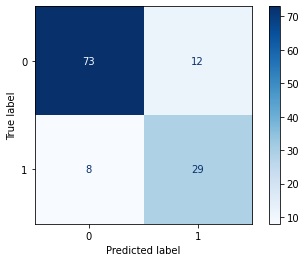

In [ ]:
plot_confusion_matrix(cnb_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 29
- TN = 73
- FP = 12
- FN = 8

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.87

In [ ]:
accuracy_score(y_test, knn_y_pred)

0.8360655737704918

ค่าความแม่นยำ Accuracy ได้ 0.83

In [ ]:
scores_model.append({'Model': 'Naive Bayes',  #เก็บค่า score ที่ได้ใน scores_model
                    'F1_Score': f1_score(y_test, knn_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, knn_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'SVM',
  'F1_Score': 0.8055555555555555,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'KNN',
  'F1_Score': 0.6984126984126985,
  'Accuracy_Score': 0.8442622950819673},
 {'Model': 'Naive Bayes',
  'F1_Score': 0.7435897435897435,
  'Accuracy_Score': 0.8360655737704918}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ Naive Bayes model

## Random Forest

In [ ]:
param_dist = {
              'criterion': ["gini", "entropy"],
              'n_estimators': [8, 10, 20, 50, 100],
              'max_depth' : [3, 5, 7, 9, None],
               "ccp_alpha" : [0, 0.1, .01, .001, .0001],
               "min_samples_split" : range(1, 41, 5)
              }
crdf = RandomForestClassifier(random_state= 1)
crdf_cv = GridSearchCV(crdf, param_dist, cv = 5,scoring = 'f1')

Parameter ที่จะใช้ในการ tune Random forest มีดังนี้ 
ข้อมูลจาก [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- n_estimatorsint, default=100
The number of trees in the forest.
- criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
- max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_splitint or float, default=2 The minimum number of samples required to split an internal node:
  - If int, then consider min_samples_split as the minimum number.

  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

- ccp_alpha non-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

In [ ]:
crdf_cv.fit(X_train, y_train) # train ข้อมูล

In [ ]:
crdf_cv.best_params_  #แสดงค่า best parameter ที่ได้จากการ tune 

{'ccp_alpha': 0,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 36,
 'n_estimators': 10}

In [ ]:
forest_y_pred = crdf_cv.predict(X_test) #ทำการ predict กับ test set

In [ ]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        85
           1       0.79      0.59      0.68        37

    accuracy                           0.83       122
   macro avg       0.81      0.76      0.78       122
weighted avg       0.82      0.83      0.82       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.8-
- มี F1-score ที่ label 0 เท่ากับ 0.88
- มี F1-score ที่ label 1 เท่ากับ 0.68

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


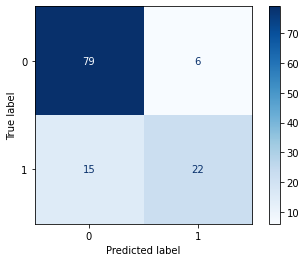

In [ ]:
plot_confusion_matrix(crdf_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 22
- TN = 79
- FP = 6
- FN = 15

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.87

In [ ]:
accuracy_score(y_test, forest_y_pred)

0.8278688524590164

ค่าความแม่นยำ Accuracy ได้ 0.82

In [ ]:
scores_model.append({'Model': 'Random forest', #เก็บค่า score ที่ได้ใน scores_model
                    'F1_Score': f1_score(y_test, forest_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, forest_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'SVM',
  'F1_Score': 0.8055555555555555,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'KNN',
  'F1_Score': 0.6984126984126985,
  'Accuracy_Score': 0.8442622950819673},
 {'Model': 'Naive Bayes',
  'F1_Score': 0.7435897435897435,
  'Accuracy_Score': 0.8360655737704918},
 {'Model': 'Random forest',
  'F1_Score': 0.676923076923077,
  'Accuracy_Score': 0.8278688524590164}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ Random forrest model

## Logistic Regression 

In [ ]:
param_dist = {
              'penalty': ["l1", "l2", "elasticnet"],
              'C': [100,10,1.0,0.1,0.01],
              'solver' : ["newton-cg", "lbfgs", "liblinear"],
              "max_iter" : [10, 25, 50, 100]
              }
clg = LogisticRegression(random_state= 1)
clg_cv = GridSearchCV(clg, param_dist, cv = 5,  scoring = 'f1')              

Parameter ที่จะใช้ในการ tune Random forest มีดังนี้ 
ข้อมูลจาก [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Specify the norm of the penalty:

  - 'none': no penalty is added;

  - 'l2': add a L2 penalty term and it is the default choice;

  - 'l1': add a L1 penalty term;

  - 'elasticnet': both L1 and L2 penalty terms are added.

- C float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- max_iter int, default=100
Maximum number of iterations taken for the solvers to converge.

- solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

In [ ]:
clg_cv.fit(X_train, y_train) # train ข้อมูล

In [ ]:
clg_cv.best_params_  #แสดงค่า best parameter ที่ได้จากการ tune 

{'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
log_y_pred = clg_cv.predict(X_test)

In [ ]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        85
           1       0.90      0.76      0.82        37

    accuracy                           0.90       122
   macro avg       0.90      0.86      0.88       122
weighted avg       0.90      0.90      0.90       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.90
- มี F1-score ที่ label 0 เท่ากับ 0.93
- มี F1-score ที่ label 1 เท่ากับ 0.82

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


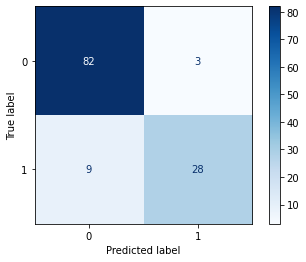

In [ ]:
plot_confusion_matrix(clg_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 28
- TN = 82
- FP = 3
- FN = 9

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.84

In [ ]:
accuracy_score(y_test, log_y_pred)

0.9016393442622951

ค่าความแม่นยำ Accuracy ได้ 0.90

In [ ]:
scores_model.append({'Model': 'Logistic Regression', #เก็บค่า score ที่ได้ใน scores_model
                    'F1_Score': f1_score(y_test, log_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, log_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'SVM',
  'F1_Score': 0.8055555555555555,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'KNN',
  'F1_Score': 0.6984126984126985,
  'Accuracy_Score': 0.8442622950819673},
 {'Model': 'Naive Bayes',
  'F1_Score': 0.7435897435897435,
  'Accuracy_Score': 0.8360655737704918},
 {'Model': 'Random forest',
  'F1_Score': 0.676923076923077,
  'Accuracy_Score': 0.8278688524590164},
 {'Model': 'Logistic Regression',
  'F1_Score': 0.823529411764706,
  'Accuracy_Score': 0.9016393442622951}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ Logistic Regression model

## XGBoost

XGBoost เป็น ensemble learning method ซึ่งเป็นการเรียนรู้แบบ multiple-learners หรือก็คือการเรียนรู้แบบมีผู้เรียนหลายๆคน ช่วยๆกันเรียน

In [ ]:
param_dist = {
              'learning_rate': [1.0, 0.1, 0.3, 0.01, 0.001, 0.0001, 0.00001],
              'gamma': [0,0.1,0.5,1.0],
              'max_depth' : [4, 5, 6, 10],
              "subsample" : [0.6, 0.8, 1],
              "min_child_weight" : [1,3,6,]
              }
cxg= XGBClassifier()
cxg_cv = GridSearchCV(estimator = cxg, param_grid = param_dist, cv = 5, scoring = 'f1' )


Parameter ที่จะใช้ในการ tune Random forest มีดังนี้ 
ข้อมูลจาก [link](https://xgboost.readthedocs.io/en/stable/parameter.html)
- gamma [default=0, alias: min_split_loss]  Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
- learning_rate Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
- max_depth [default=6] Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value.
- subsample [default=1] Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.
- min_child_weight [default=1] Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.


In [ ]:
cxg_cv.fit(X_train, y_train)

In [ ]:
cxg_cv.best_params_  #แสดงค่า best parameter ที่ได้จากการ tune 

{'gamma': 0,
 'learning_rate': 0.0001,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1}

In [ ]:
xg_y_pred = cxg_cv.predict(X_test)

In [ ]:
print(classification_report(y_test, xg_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        85
           1       0.84      0.70      0.76        37

    accuracy                           0.87       122
   macro avg       0.86      0.82      0.84       122
weighted avg       0.87      0.87      0.87       122



จากด้านบนเป็น Classification report 
- มี accuracy เท่ากับ 0.87
- มี F1-score ที่ label 0 เท่ากับ 0.91
- มี F1-score ที่ label 1 เท่ากับ 0.76

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


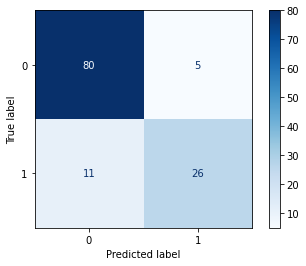

In [ ]:
plot_confusion_matrix(cxg_cv, X_test, y_test, cmap = 'Blues')

พลอต confusion matrix จะได้ 
- TP = 26
- TN = 80
- FP = 5
- FN = 11

กราฟ ROC & AUC curve จะเป็นตามรูปด้านบนมี AUC = 0.87

In [ ]:
accuracy_score(y_test, xg_y_pred)

0.8688524590163934

ค่าความแม่นยำ Accuracy ได้ 0.86

In [ ]:
scores_model.append({'Model': 'XGBoost', #เก็บค่า score ที่ได้ใน scores_model
                    'F1_Score': f1_score(y_test, xg_y_pred),
                    'Accuracy_Score': accuracy_score(y_test, xg_y_pred)})

In [ ]:
scores_model

[{'Model': 'Decision Tree',
  'F1_Score': 0.8108108108108109,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'SVM',
  'F1_Score': 0.8055555555555555,
  'Accuracy_Score': 0.8852459016393442},
 {'Model': 'KNN',
  'F1_Score': 0.6984126984126985,
  'Accuracy_Score': 0.8442622950819673},
 {'Model': 'Naive Bayes',
  'F1_Score': 0.7435897435897435,
  'Accuracy_Score': 0.8360655737704918},
 {'Model': 'Random forest',
  'F1_Score': 0.676923076923077,
  'Accuracy_Score': 0.8278688524590164},
 {'Model': 'Logistic Regression',
  'F1_Score': 0.823529411764706,
  'Accuracy_Score': 0.9016393442622951},
 {'Model': 'XGBoost',
  'F1_Score': 0.7647058823529411,
  'Accuracy_Score': 0.8688524590163934}]

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ XGBoost model

***
## Ensemble

-ขั้นตอนการ Ensemble จะรวมเอา label y_pred ที่ได้จาก model หลายๆโมเดล มาทำการโหวต

ทำ Majority Vote เพื่อเลือกผลลัพท์ที่ Model ทำนายออกมาเหมือนกันมากที่สุด เอาหกโมเดลมารวมกัน

In [ ]:
# สร้าง DataFrame ของค่า predict แต่ละ model
voting_df = pd.DataFrame({'Tree':tree_y_pred, 'SVM':svm_y_pred, 
                          'KNN':knn_y_pred, 'Forest':forest_y_pred, 
                          'logistic':log_y_pred, 'XgBoost': xg_y_pred})

In [ ]:
voting_df

,Tree,SVM,KNN,Forest,logistic,XgBoost
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1
...,...,...,...,...,...,...
117,0,0,0,0,0,0
118,1,1,1,1,1,1
119,1,1,1,0,1,1
120,0,0,0,0,0,0


หาผลรวมการทำนายของทุก model

In [ ]:
voting_df = voting_df.sum(axis=1)

In [ ]:
voting_df

0      0
1      1
2      0
3      0
4      6
      ..
117    0
118    6
119    5
120    0
121    5
Length: 122, dtype: int64

สร้างผลลัพธ์โดยกำหนดว่าถ้าผลรวมการทำนาย >= 4 ให้ทำนายเป็น 1 ถ้าไม่ใช่ = 0

In [ ]:
# your code here
result = voting_df.apply(lambda x:1 if x>=4 else 0)

In [ ]:
print('Result:')
print(result)

Result:
0      0
1      0
2      0
3      0
4      1
      ..
117    0
118    1
119    1
120    0
121    1
Length: 122, dtype: int64


In [ ]:
print('Accuracy Score:')
print(accuracy_score(y_test, result))

Accuracy Score:
0.8770491803278688


ค่าความแม่นยำที่ได้ accuracy = 0.87

In [ ]:
f1_score(y_test, result)

0.7887323943661971

ค่า f1_score = 0.78

ค่า roc_auc = 0.84

In [ ]:
scores_model.append({'Model': 'Ensemble',
                    'F1_Score': f1_score(y_test, result),
                    'Accuracy_Score': accuracy_score(y_test, result)})

ใน scores_model จะเก็บค่า Accuracy, F1-score และ ROC_AUC score ของ Ensemble model

# Evaluate model 

หลังจากที่ได้ทำการประเมินโมเดลทั้งหมดแล้วจะนำคะแนนที่ได้มาที่ถูกเก็บไว้ใน scores_model จะนำมาสร้าง dataframe แล้วทำการเรียงลำดับค่าตาม roc_auc score จากมากไปน้อย ซึ่งจะได้ผลตามตารางด้านล่าง

In [ ]:
results = pd.DataFrame(scores_model).sort_values(by='F1_Score',ascending=False)
results.style.background_gradient(cmap='Blues')

,Model,F1_Score,Accuracy_Score
5,Logistic Regression,0.823529,0.901639
0,Decision Tree,0.810811,0.885246
1,SVM,0.805556,0.885246
7,Ensemble,0.788732,0.877049
8,Ensemble,0.788732,0.877049
6,XGBoost,0.764706,0.868852
3,Naive Bayes,0.743590,0.836066
2,KNN,0.698413,0.844262
4,Random forest,0.676923,0.827869


จากตารางด้านบนจะเห็นได้ว่า โมเดล Decision trees ให้ประสิทธิภาพดีที่สุดเมื่อใช้ metric อย่าง roc_auc score มาใช้ซึ่งอยู่ที่ 0.86 แต่ในกรณีที่วัด Acccuracy และ F1-score โมเดล Logistic regression จะให้ประสิทธิภาพที่ดีกว่า

จัดทำโดย

ศิระ หฤทัยปรีย์ 64607065